In [1]:
"""
@author: Iñigo
"""

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
am15_spectra=pd.read_excel('./data/astmg173.xls', sheet_name='SMARTS2')
am15g=(np.array(am15_spectra['Wvlgth nm']), np.array(am15_spectra['Global tilt W*m-2*nm-1']))

In [6]:
def used_factor(x, bg):
    ener=1240/x
    if ener<bg:
        return 0
    return (bg/ener)

bg_Si = 1.12

used = []
for energy in am15g[0]:
    used.append(used_factor(energy, bg_Si))

/home/inigo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


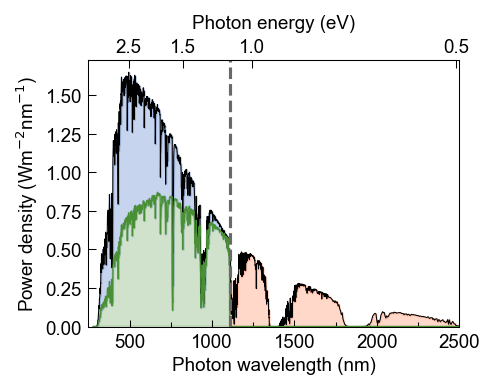

In [9]:
fig = plt.figure(figsize=(FIG_WIDTH, 2.7), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw = 0.5
all_data = am15g[1]
used_data = all_data * used
ax.plot(am15g[0], all_data, c='black', lw=lw)
ax.plot(am15g[0], used_data, c=colors['color3'], lw=lw, alpha=1)
ax.fill_between(am15g[0], all_data, used_data, color=colors['color9'], alpha=.3, where=am15g[0]<1240/bg_Si)
ax.fill_between(am15g[0], all_data, used_data, color=colors['color15'], alpha=.3, where=am15g[0]>=1240/bg_Si)
ax.fill_between(am15g[0], used_data, color=colors['color3'], alpha=.25, where=am15g[0]>bg_Si)

ax.set_xlabel('Photon wavelength (nm)')
ax.set_ylabel(r'Power density (Wm$^{-2}$nm$^{-1}$)')
ax.set_ylim([0, None])
ax.set_xlim([250, 2500])
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', top=False, right=False)
ax.axvline(1240/bg_Si, ls='--', lw=1.5, c=colors['color13'])

def nm2eV(x):
    return 1240/x

def eV2nm(x):
    return nm2eV(x)

secax = ax.secondary_xaxis('top', functions=(nm2eV, eV2nm))

secax.set_xticks(np.array([0.5, 1, 1.5, 2.5]))
secax.set_xlabel('Photon energy (eV)', labelpad=5)
secax.tick_params('x', pad=1.5)

plt.tight_layout()

#plt.savefig ('./energy_losses.png', dpi=DPI_SAVE)